# Grouping Powerlifters Into Different Archetypes
## By: Alexander Back

We will be using the Kaggle dataset: https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database 

The main question we want to answer are:<br>

* Can competitive powerlifters be grouped into distinct archetypes based on relative strength across squat, bench, and deadlift

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
# Import dataset
df = pd.read_csv('openpowerlifting_2024.csv')

# Disp first 5 rows and all cols
display(df.head())
df.columns

C:\Users\aback\AppData\Local\Temp\ipykernel_23584\1773445985.py:2: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting_2024.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

In [43]:
# Clean dataset
keep_cols = [
    'Sex',
    'Event',
    'Equipment',
    'Age',
    'AgeClass',
    'Division',
    'BodyweightKg',
    'WeightClassKg',
    'Best3SquatKg',
    'Best3BenchKg',
    'Best3DeadliftKg',
    'TotalKg',
    'Dots',
    'Tested',
    'Country',
    'Federation'
]

num_cols = [
    'Age',
    'BodyweightKg',
    'Best3SquatKg',
    'Best3BenchKg',
    'Best3DeadliftKg',
    'TotalKg',
    'Dots'
]
# Keep the cols into the new df
df_clean = df[keep_cols].copy()
df_clean = df_clean.dropna()
df_clean = df_clean[(df_clean[num_cols] > 0).all(axis=1)]
display(df_clean[num_cols].describe())
print(df.shape)
print(df_clean.shape)

# Display first 5 rows of df
df_clean.head()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots
count,623663.000000,623663.000000,623663.000000,623663.000000,623663.000000,623663.000000,623663.000000
mean,28.672975,82.154965,179.313349,115.335430,197.450599,492.098800,367.391329
std,12.486601,21.942379,66.607677,48.875916,60.768285,170.227454,80.318306
min,4.500000,17.700000,1.000000,5.000000,15.900000,34.500000,28.360000
25%,19.500000,66.000000,127.500000,75.000000,147.500000,351.530000,314.090000
50%,24.500000,80.700000,175.000000,115.000000,200.000000,492.500000,366.020000
75%,34.500000,94.600000,225.000000,147.500000,242.500000,612.500000,419.230000
max,95.500000,260.000000,515.000000,544.310000,430.000000,1275.500000,721.770000


(3043013, 41)
(623663, 16)


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Tested,Country,Federation
0,F,SBD,Raw,33.0,24-34,O,58.30,60,80.0,60.0,107.5,247.5,279.44,Yes,Russia,GFP
1,F,SBD,Raw,43.0,40-44,M1,73.10,75,105.0,67.5,110.0,282.5,278.95,Yes,Russia,GFP
2,M,SBD,Raw,15.5,16-17,T,67.40,75,100.0,62.5,105.0,267.5,206.40,Yes,Russia,GFP
3,M,SBD,Raw,35.0,35-39,O,66.65,75,137.5,122.5,170.0,430.0,334.49,Yes,Russia,GFP
4,M,SBD,Raw,26.5,24-34,O,72.45,75,90.0,50.0,125.0,265.0,194.46,Yes,Russia,GFP


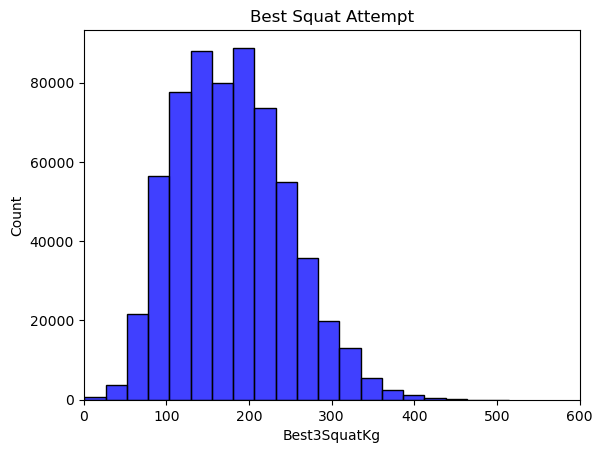

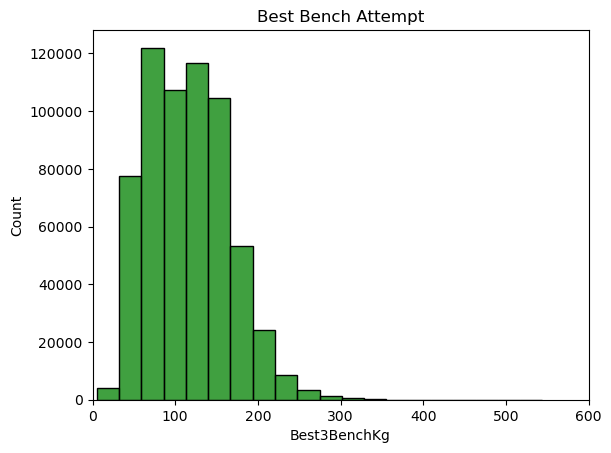

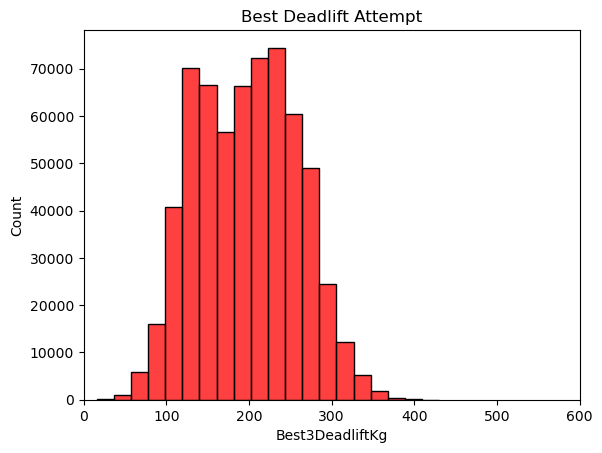

In [44]:
# Histogram for Best Squat
sns.histplot(df_clean['Best3SquatKg'], color='blue', bins=20)
plt.xlim(0, 600)
plt.title('Best Squat Attempt')
plt.show()

# Histogram for Best Bench
sns.histplot(df_clean['Best3BenchKg'], color='green', bins=20)
plt.xlim(0, 600)
plt.title('Best Bench Attempt')
plt.show()

# Histogram for Best Deadlift
sns.histplot(df_clean['Best3DeadliftKg'], color='red',bins=20)
plt.xlim(0, 600)
plt.title('Best Deadlift Attempt')
plt.show()

We see that for Sqaut and Bench that there it is a bit right skewed as the both have right tails. This means that there are outliers towards the top end of Sqaut and Bench numbers. This could be due to the fact that we have included multiple federations and both raw and equipped. Since different federations have different rules that could cause lifters to lift more and equipped powerlifting has access to equipment that helps them lift more weight. For Deadlift there seems to be a normal distribution as it is mostly a bell shape curve. This could possibly indicate that different federation rules and equipment dont offer much help for the deadlift.
Another thing to mention is that I removed any value under 0 as we are only looking for attempts that counted.